In [2]:
import numpy as np
import math
from scipy.stats import chi2
import matplotlib.pyplot as plt
from scipy.stats import uniform
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import ksone
from scipy.stats import norm
from scipy.stats import chisquare
from scipy.stats import expon
from scipy.stats import multivariate_normal
from scipy.stats import pareto
from scipy.stats import t
from mpl_toolkits.mplot3d import Axes3D

In [112]:
def GenerateStateTime(w_1,w_2,States):
    StateTimes = np.zeros((len(States),))
    for indx,s in enumerate(States):
        if s==1:
            StateTimes[indx] = -np.log(np.random.random())/w_1
        else:
            StateTimes[indx] = -np.log(np.random.random())/w_2
    return StateTimes

In [113]:
def GenerateServiceTime(servicemean,N):
    return -np.log(np.random.rand(N))*servicemean

In [114]:
def GenerateArrivalTime(lmbda,N):
    return -np.log(np.random.rand(N))/lmbda

In [115]:
def DepositToQueue(arrtime,Q,Ql):
    #T is the curret time
    #arrtime is the arrival time
    #Q is current queue
    #Ql is the queue lengths with corresponding time
    if arrtime:
        Q.append(arrtime)
        if Q:
            Ql.append([arrtime,len(Q)])
        else:
            Ql.append([arrtime,0])
    else:
        pass

In [116]:
def DrawFromQueue(T,Q,Ql,Qt,S):
    #T is current time
    #Q is current queue
    #Qt is total queue waiting times
    #S is server status
    #s is service time mean
    #Ql is the queue lengths with corresponding time
    Qt.append(T-Q[0])
    Q.pop(0)
    if Q:
        Ql.append([T,len(Q)])
    else:
        Ql.append([T,0])
    S = 1
    return S

In [151]:
def SimQueueIPP(N,servicemean,w_1,w_2,lmbda,K,L):
    import heapq
    #N is the number of units
    #s is the service time mean
    #w_1 is the frequency to switching from ON to OFF
    #w_2 is the frequency to switching from OFF to ON
    #lmbda is the arrival intensity
    #L is the superpositions
    Q = []
    Qt = []
    Ql = []
    M = 0
    S = np.zeros((N,))
    States = np.ones((L,))
    T = 0
    events = []
    StateTime = GenerateStateTime(w_1,w_2,States)
    arrival = GenerateArrivalTime(lmbda,L)
    for indx,e in enumerate(StateTime):
        heapq.heappush(events,(e,('StateChange',indx)))
    for indx,e in enumerate(arrival):
        heapq.heappush(events,(e,('Arrival',indx)))
    k = 0
    while(k<K):
        #print(list(events))
        #print(Ql)
        event = heapq.heappop(events)
        T = event[0]
        if event[1][0]=='StateChange':
            pass
        elif event[1][0]=='Arrival':
            indx = event[1][1]
            if States[indx]==0:
                continue
            else:
                arrivaltime = GenerateArrivalTime(lmbda,1)[0]
                if np.any(S==0):
                    serverindx = np.argmax(S==0)
                    servicetime = GenerateServiceTime(servicemean,1)[0]
                    heapq.heappush(events,(servicetime+T,('Service',serverindx)))
                    heapq.heappush(events,(arrivaltime+T,('Arrival',indx)))
                    S[serverindx] = 1
                else:
                    DepositToQueue(T,Q,Ql)
                    heapq.heappush(events,(arrivaltime+T,('Arrival',indx)))
                    M += 1
        elif event[1][0]=='Service':
            indx = event[1][1]
            S[indx] = 0
            k+=1
            #print(Ql)
            if Q:
                S[indx] = DrawFromQueue(T,Q,Ql,Qt,S[indx])
                servicetime = GenerateServiceTime(servicemean,1)[0]
                heapq.heappush(events,(servicetime+T,('Service',indx)))
            else:
                continue
    return Ql,Qt,M

In [155]:
M

3644

In [157]:
Ms = []
for i in range(100):
    Ql,Qt,M=SimQueueIPP(10,8,2,2,1,10000,1)
    Ms.append(M)
mean = np.mean(Ms) 
print(mean)
S = np.var(Ms,ddof=1)
print([mean+t.ppf(0.025,100)*np.sqrt(S)/np.sqrt(100),mean+t.ppf(0.975,100)*np.sqrt(S)/np.sqrt(100)])

4092.69
[4038.1042211194535, 4147.2757788805466]


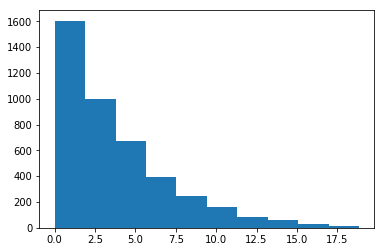

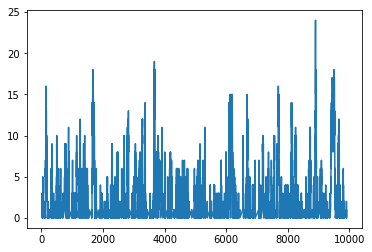

In [158]:
plt.figure()
plt.hist(Qt)
Ql = np.array(Ql)
plt.figure()
plt.plot(Ql[:,0],Ql[:,1])
plt.show()

In [53]:
10**8/math.factorial(8)

[0.17064424663476704,
 0.175673432357417,
 0.53878421857740522,
 0.39624028152851953,
 1.0124702507853478,
 0.42148562630819758,
 1.5260854221036428,
 0.27918769477531963,
 0.49578346184418981,
 0.77220242263076855,
 0.91914438524717246,
 1.4513843261417581,
 0.15710328669397816,
 0.62699834967066048,
 0.13677631677383231,
 0.32270497732417303,
 3.3035917643858053,
 0.79241738006927764,
 3.0211237136489419,
 1.0164461644317815]

In [55]:
strcomp('hey','hey')

NameError: name 'strcomp' is not defined